In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#import bamboolib as bam
from scipy.stats import chi2_contingency


In [4]:
# Assuming you have a DataFrame named df
# Replace this with your actual DataFrame or data loading code
df = pd.read_csv(r'C:\Users\Zeeshan\Desktop\New folder (2)\bank-full 1.csv')

# Open the DataFrame in bamboolib
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [5]:
# Check for different representations of missing values
missing_values = df.apply(lambda x: x.astype(str).str.contains('NA')).sum()
print("Missing Values Summary:")
print(missing_values)

Missing Values Summary:
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


In [6]:
df.head

<bound method NDFrame.head of        age           job   marital  education default  balance housing loan  \
0       58    management   married   tertiary      no     2143     yes   no   
1       44    technician    single  secondary      no       29     yes   no   
2       33  entrepreneur   married  secondary      no        2     yes  yes   
3       47   blue-collar   married    unknown      no     1506     yes   no   
4       33       unknown    single    unknown      no        1      no   no   
...    ...           ...       ...        ...     ...      ...     ...  ...   
45206   51    technician   married   tertiary      no      825      no   no   
45207   71       retired  divorced    primary      no     1729      no   no   
45208   72       retired   married  secondary      no     5715      no   no   
45209   57   blue-collar   married  secondary      no      668      no   no   
45210   37  entrepreneur   married  secondary      no     2971      no   no   

         contact  day

In [7]:
# Inspect placeholder values like 'unknown'
placeholder_counts = {col: df[col].value_counts().get('unknown', 0) for col in df.columns if df[col].dtype == object}

# Get summary statistics for numerical columns
numerical_summary = df.describe()

# Print placeholder counts and numerical summary
print(placeholder_counts)
print(numerical_summary)

{'job': 288, 'marital': 0, 'education': 1857, 'default': 0, 'housing': 0, 'loan': 0, 'contact': 13020, 'month': 0, 'poutcome': 36959, 'y': 0}
                age        balance           day      duration      campaign  \
count  45211.000000   45211.000000  45211.000000  45211.000000  45211.000000   
mean      40.936210    1362.272058     15.806419    258.163080      2.763841   
std       10.618762    3044.765829      8.322476    257.527812      3.098021   
min       18.000000   -8019.000000      1.000000      0.000000      1.000000   
25%       33.000000      72.000000      8.000000    103.000000      1.000000   
50%       39.000000     448.000000     16.000000    180.000000      2.000000   
75%       48.000000    1428.000000     21.000000    319.000000      3.000000   
max       95.000000  102127.000000     31.000000   4918.000000     63.000000   

              pdays      previous  
count  45211.000000  45211.000000  
mean      40.197828      0.580323  
std      100.128746      2.30

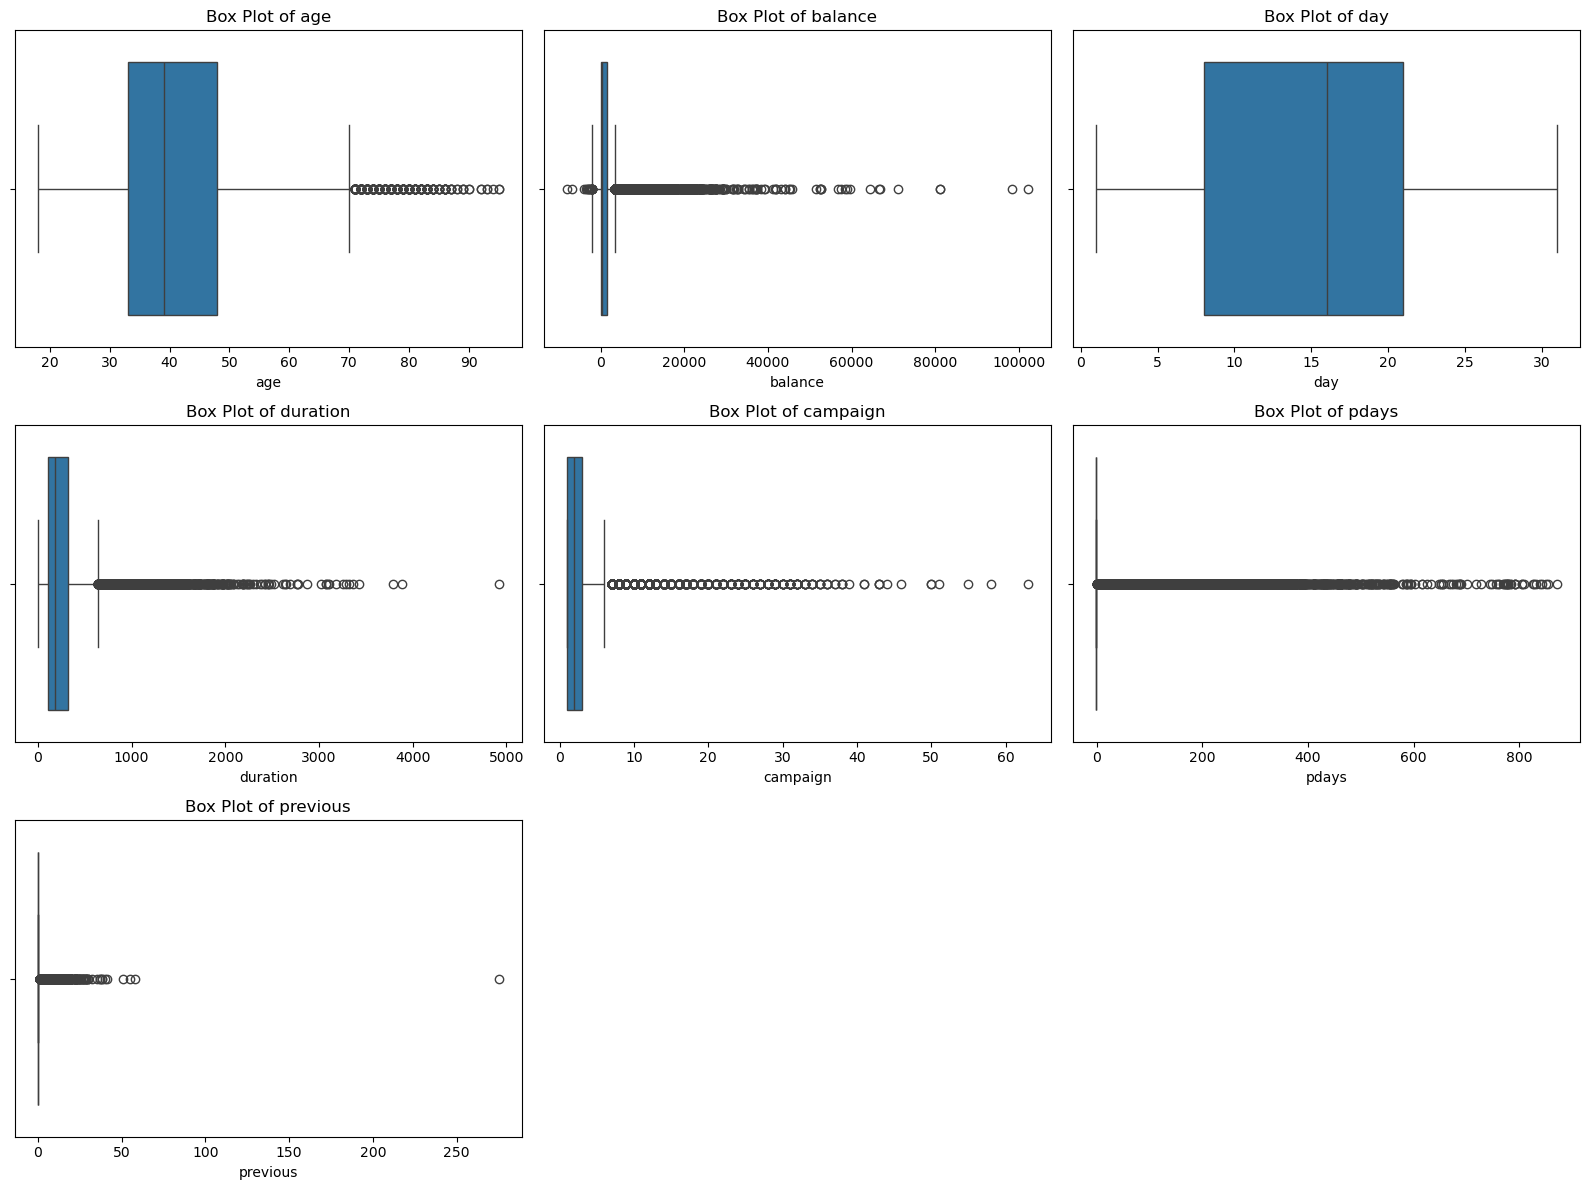

In [8]:
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Adjust the layout size based on the number of numeric columns
num_cols = len(numeric_columns)
num_rows = (num_cols // 3) + (num_cols % 3 > 0)  # Round up to the nearest integer

# Create box plots for numeric columns to identify outliers
plt.figure(figsize=(16, 4 * num_rows))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(num_rows, 3, i)
    sns.boxplot(x=df[col])
    plt.title(f'Box Plot of {col}')
    plt.tight_layout()

plt.show()

In [9]:
# We removed 1 row 
df1 = df[df['previous'] != 275]

# Now 'df' contains rows where the "previous" column does not have a value of 275

In [10]:
df1.head

<bound method NDFrame.head of        age           job   marital  education default  balance housing loan  \
0       58    management   married   tertiary      no     2143     yes   no   
1       44    technician    single  secondary      no       29     yes   no   
2       33  entrepreneur   married  secondary      no        2     yes  yes   
3       47   blue-collar   married    unknown      no     1506     yes   no   
4       33       unknown    single    unknown      no        1      no   no   
...    ...           ...       ...        ...     ...      ...     ...  ...   
45206   51    technician   married   tertiary      no      825      no   no   
45207   71       retired  divorced    primary      no     1729      no   no   
45208   72       retired   married  secondary      no     5715      no   no   
45209   57   blue-collar   married  secondary      no      668      no   no   
45210   37  entrepreneur   married  secondary      no     2971      no   no   

         contact  day

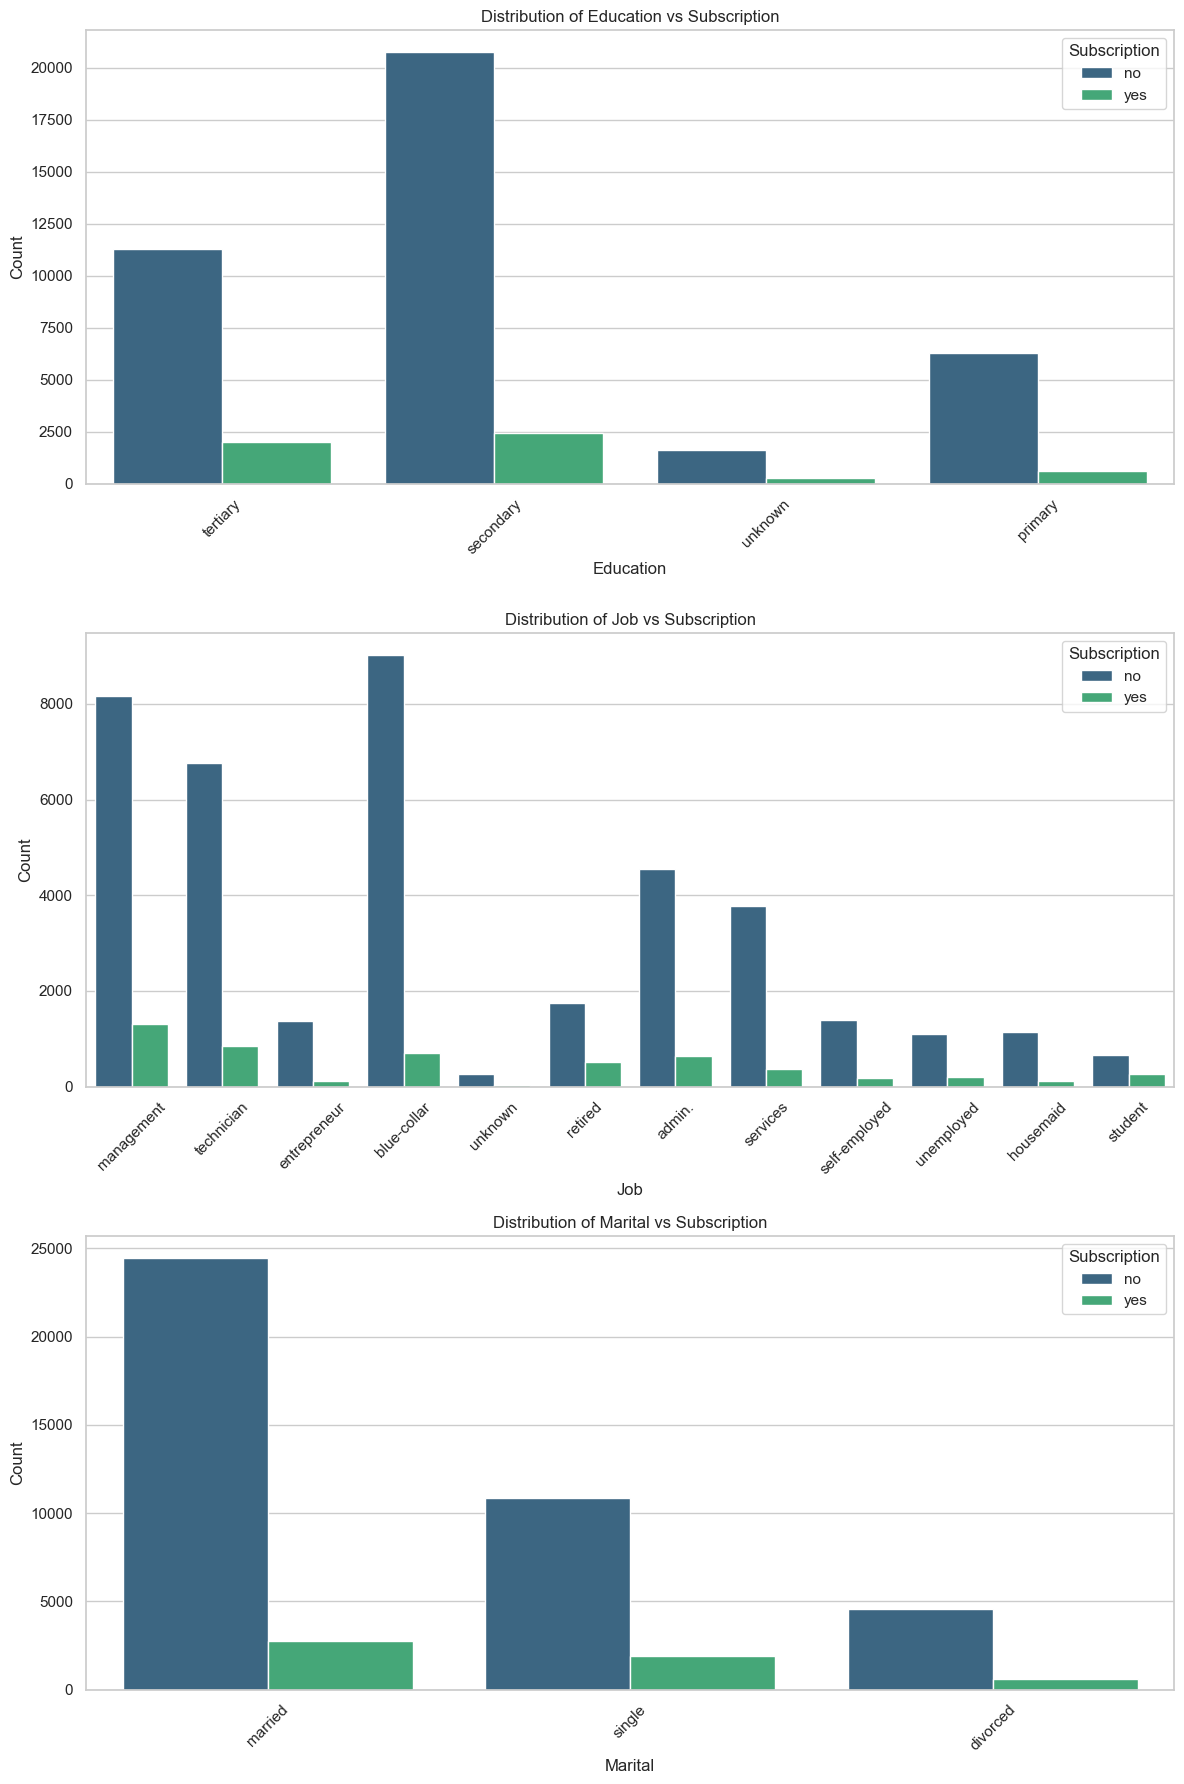

In [11]:
# Setting visualisation styles
sns.set(style="whitegrid")

# Define a list of categorical variables for EDA
categorical_vars = ['education', 'job', 'marital']

# Plotting
fig, axes = plt.subplots(nrows=len(categorical_vars), ncols=1, figsize=(12, 18))

for i, var in enumerate(categorical_vars):
    sns.countplot(x=var, hue='y', data=df, palette='viridis', ax=axes[i])
    axes[i].set_title(f'Distribution of {var.capitalize()} vs Subscription')
    axes[i].set_xlabel(var.capitalize())
    axes[i].set_ylabel('Count')
    axes[i].legend(title='Subscription', loc='upper right')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


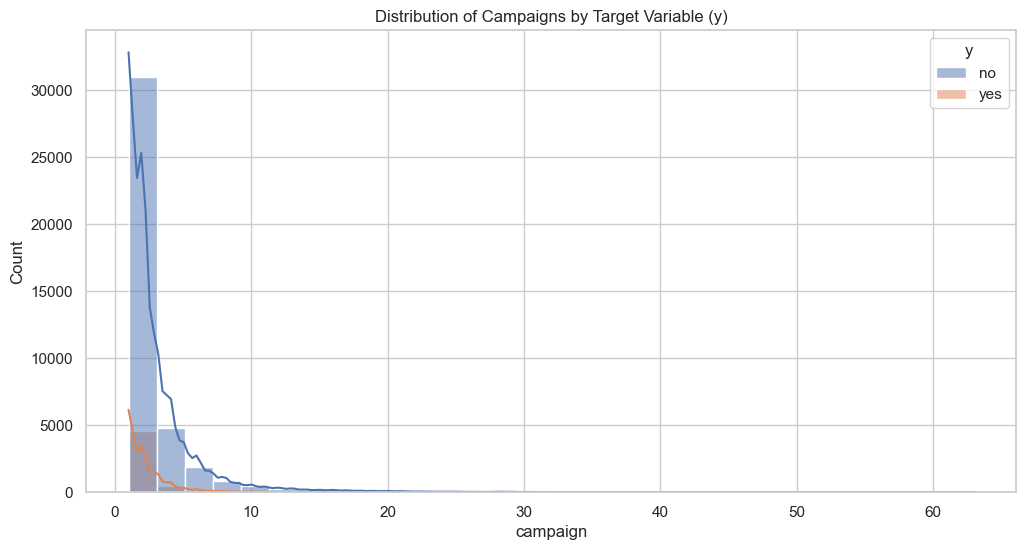

In [12]:
# Numerical Variable: 'campaign'
plt.figure(figsize=(12, 6))
sns.histplot(df, x='campaign', hue='y', bins=30, kde=True)
plt.title('Distribution of Campaigns by Target Variable (y)')
plt.show()

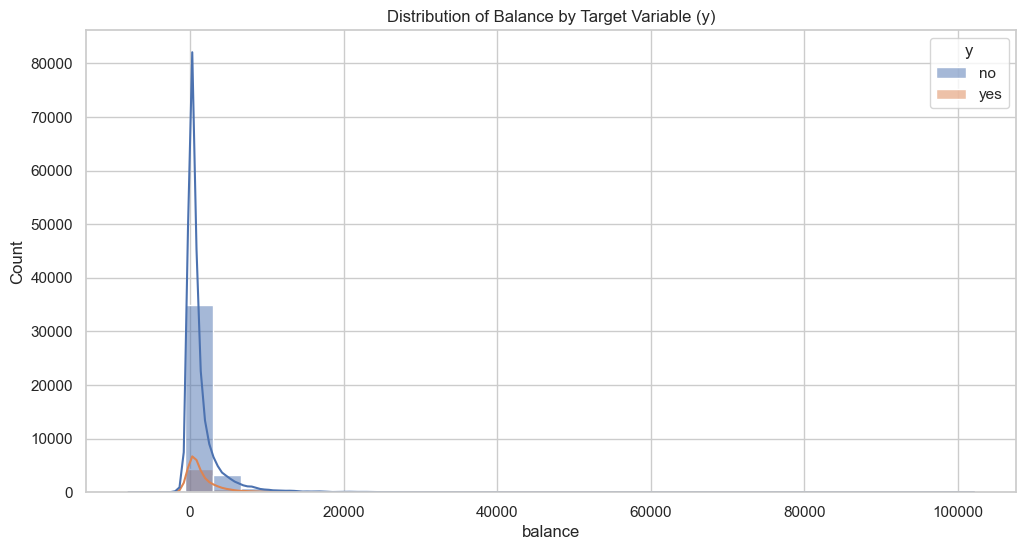

In [13]:
# Numerical Variable: 'balance'
plt.figure(figsize=(12, 6))
sns.histplot(df, x='balance', hue='y', bins=30, kde=True)
plt.title('Distribution of Balance by Target Variable (y)')
plt.show()



In [14]:
# Count the number of 'Yes' and 'No' in the subscription column 'y'
subscription_counts = df['y'].value_counts()

print(subscription_counts)


y
no     39922
yes     5289
Name: count, dtype: int64


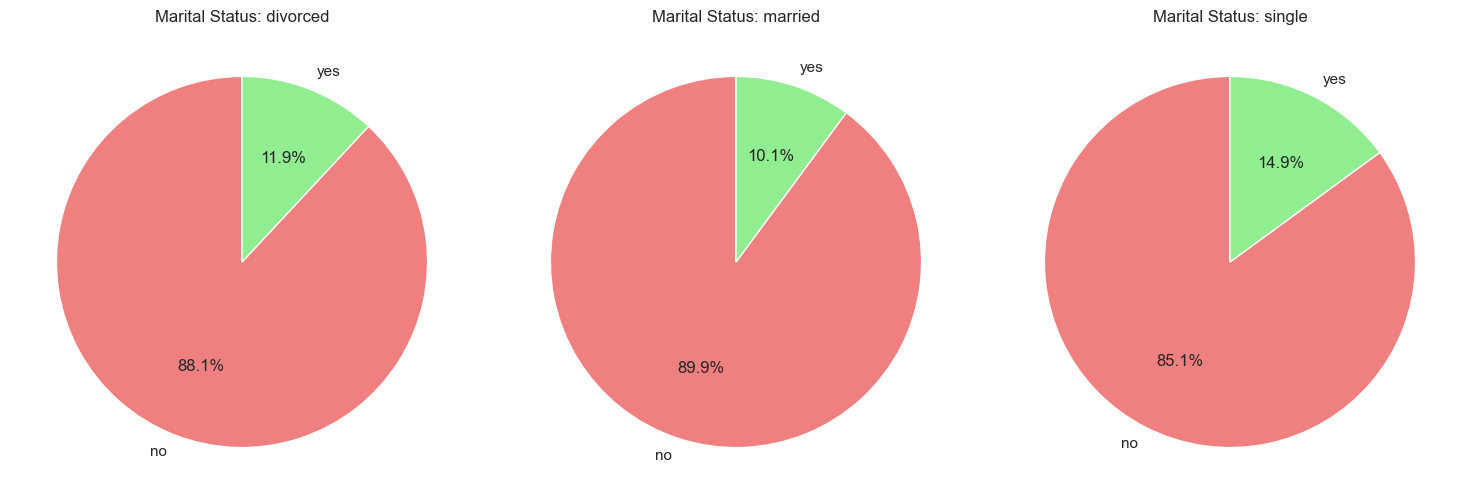

In [15]:

sns.set(style="whitegrid")
plt.figure(figsize=(15, 5))
 
# Group by marital status and count the 'yes' and 'no' values
marital_counts = df.groupby(['marital', 'y']).size().unstack()
 
# Plot pie charts for each marital status category
for i, marital_status in enumerate(marital_counts.index):
    plt.subplot(1, 3, i + 1)
    plt.pie(marital_counts.loc[marital_status], labels=marital_counts.columns, autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'lightgreen'])
    plt.title(f'Marital Status: {marital_status}')
 
# Adjust layout
plt.tight_layout()
 
# Show the plots
plt.show()

C:\Users\Zeeshan\AppData\Local\Temp\ipykernel_10836\615669886.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=var, data=df_yes, palette='viridis', ax=axes[i])
C:\Users\Zeeshan\AppData\Local\Temp\ipykernel_10836\615669886.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=var, data=df_yes, palette='viridis', ax=axes[i])
C:\Users\Zeeshan\AppData\Local\Temp\ipykernel_10836\615669886.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=var, data=df_yes, palette='viridis', ax=axes[i])


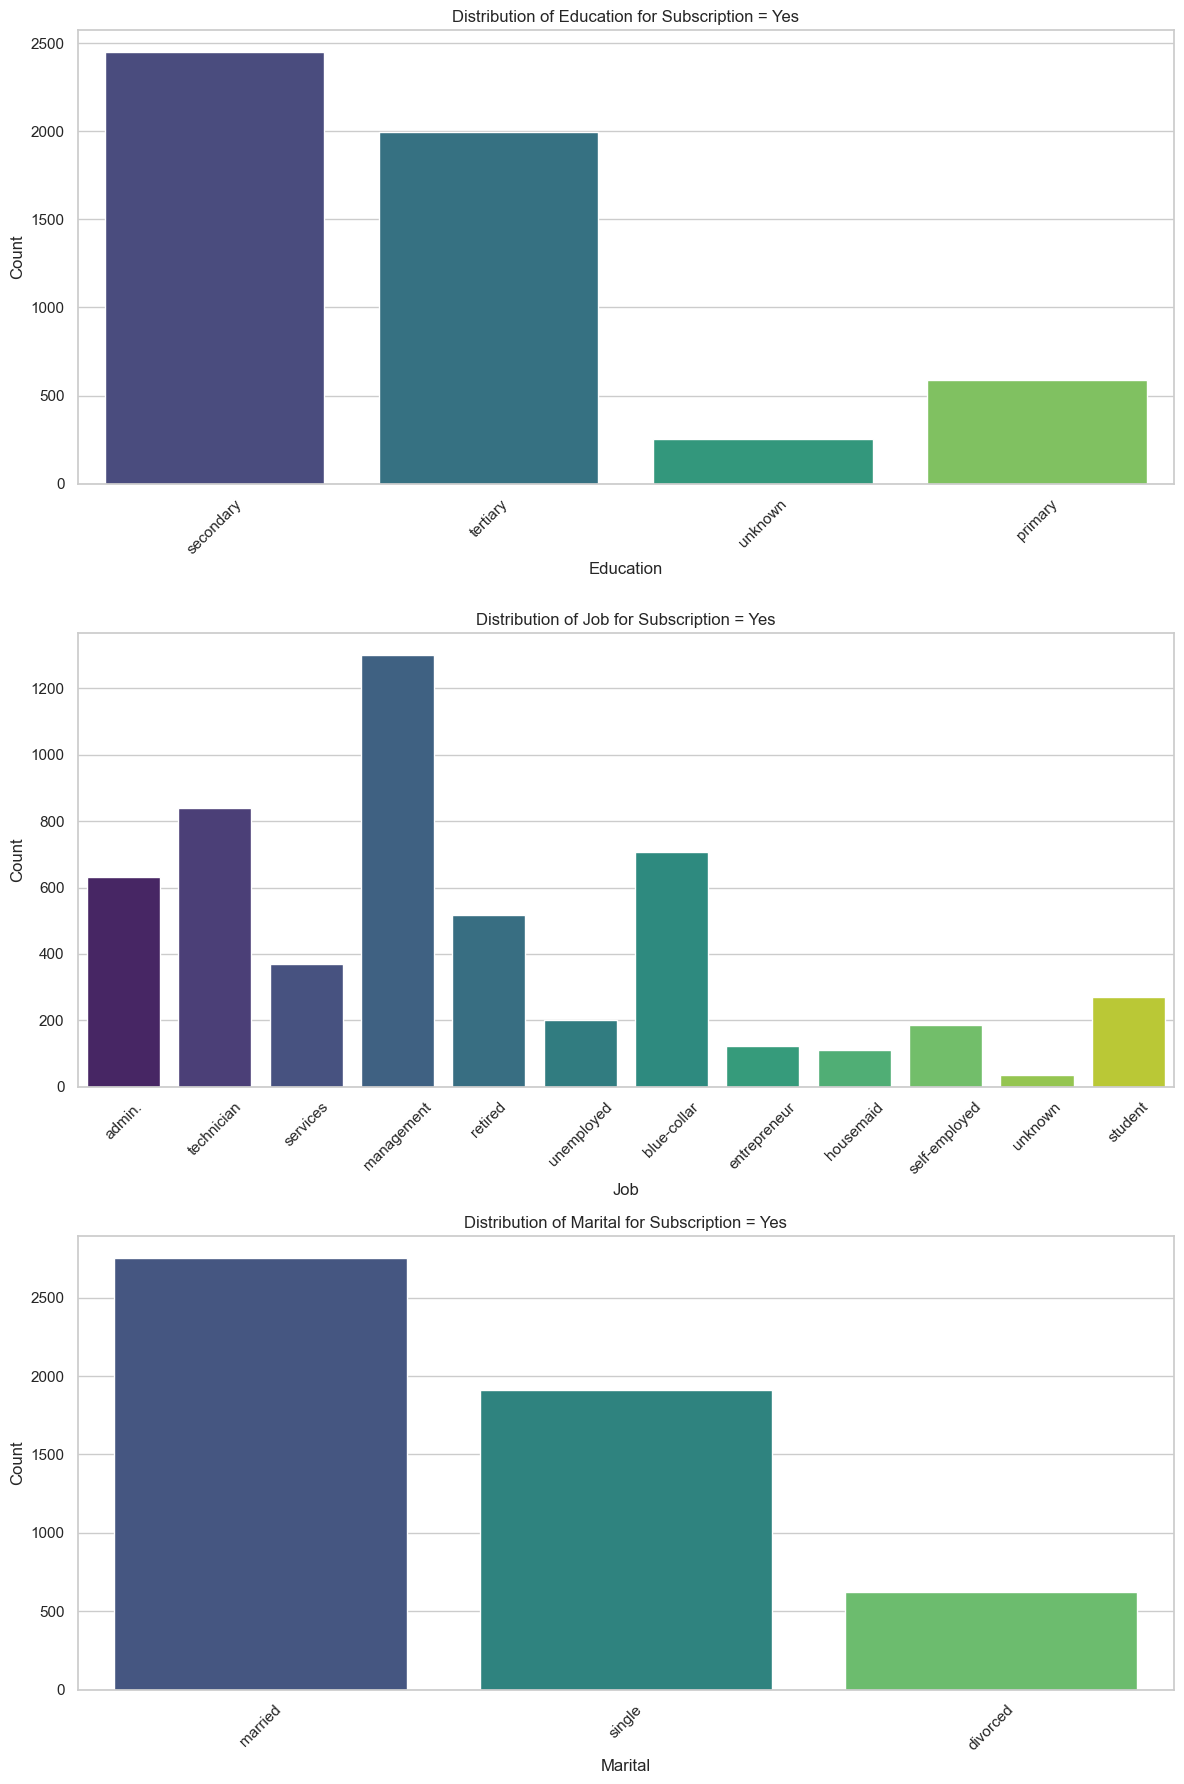

In [16]:
# Filter the dataset for 'Yes' responses
df_yes = df[df['y'] == 'yes']

# Plotting for categorical variables focusing on 'Yes' responses
fig, axes = plt.subplots(nrows=len(categorical_vars), ncols=1, figsize=(12, 18))

for i, var in enumerate(categorical_vars):
    sns.countplot(x=var, data=df_yes, palette='viridis', ax=axes[i])
    axes[i].set_title(f'Distribution of {var.capitalize()} for Subscription = Yes')
    axes[i].set_xlabel(var.capitalize())
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


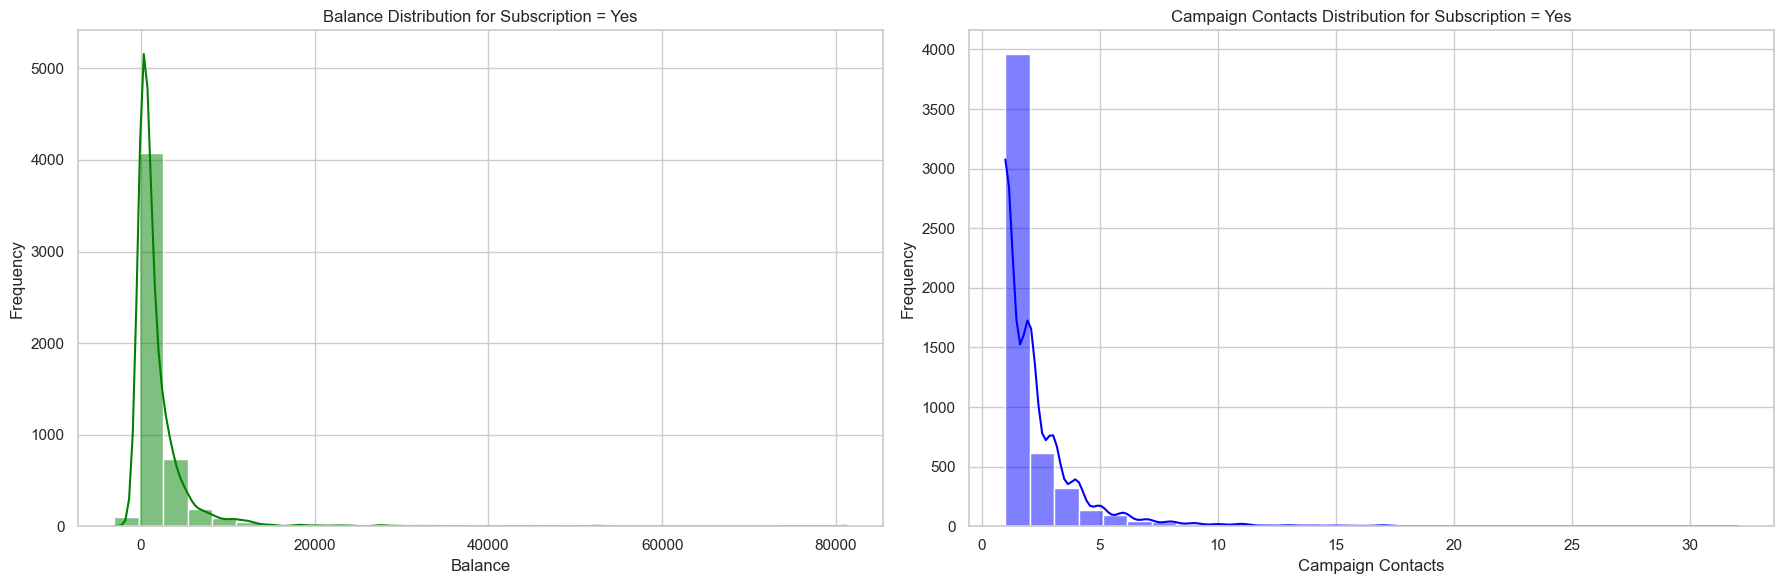

Balance Summary for Subscription = Yes:
count     5289.000000
mean      1804.267915
std       3501.104777
min      -3058.000000
25%        210.000000
50%        733.000000
75%       2159.000000
max      81204.000000
Name: balance, dtype: float64

Campaign Summary for Subscription = Yes:
count    5289.000000
mean        2.141047
std         1.921826
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        32.000000
Name: campaign, dtype: float64


In [17]:
# Summary statistics for 'balance' and 'campaign' for 'Yes' responses
balance_summary_yes = df_yes['balance'].describe()
campaign_summary_yes = df_yes['campaign'].describe()

# Visualizing 'balance' and 'campaign' distributions for 'Yes' responses
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

sns.histplot(df_yes['balance'], bins=30, kde=True, color='green', ax=axes[0])
axes[0].set_title('Balance Distribution for Subscription = Yes')
axes[0].set_xlabel('Balance')
axes[0].set_ylabel('Frequency')

sns.histplot(df_yes['campaign'], bins=30, kde=True, color='blue', ax=axes[1])
axes[1].set_title('Campaign Contacts Distribution for Subscription = Yes')
axes[1].set_xlabel('Campaign Contacts')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

# Print summary statistics for 'Yes' responses
print("Balance Summary for Subscription = Yes:")
print(balance_summary_yes)
print("\nCampaign Summary for Subscription = Yes:")
print(campaign_summary_yes)


In [18]:
# Feature engineering for 'duration'
def categorize_duration(duration):
    if duration < 500:
        return 'Short'
    elif duration < 1000:
        return 'Medium'
    else:
        return 'Long'
 
df['duration_category'] = df['duration'].apply(categorize_duration)
 
# Feature engineering for 'balance'
def categorize_balance(balance):
    if balance < 2000:
        return 'Low'
    elif balance < 5000:
        return 'Medium'
    else:
        return 'High'
 
df['balance_category'] = df['balance'].apply(categorize_balance)
 
# Feature engineering for 'age'
def categorize_age(age):
    if age < 30:
        return 'Young'
    elif age < 60:
        return 'Adult'
    else:
        return 'Senior'
 
df['age_category'] = df['age'].apply(categorize_age)
 
# Save the modified DataFrame
df.to_csv('bank_featured.csv', index=False)

# Define bins and labels for the categorization
#bins = [-float('inf'), 0, 5000, 10000, 50000, float('inf')] 
 #labels = [0, 1, 2, 3, 4] 
# Categorize 'balance' using defined bins and labels
#df['balance_category'] = pd.cut(df['balance'], bins=bins, labels=labels, include_lowest=True) 
# Check the first few rows to verify the new column
# print(df[['balance', 'balance_category']].head())


In [19]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,duration_category,balance_category,age_category
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,Short,Medium,Adult
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,Short,Low,Adult
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,Short,Low,Adult
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,Short,Low,Adult
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,Short,Low,Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes,Medium,Low,Adult
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes,Short,Low,Senior
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes,Long,High,Senior
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no,Medium,Low,Adult


In [ ]:
#df.to_csv(r'C:\Users\Zeeshan\Downloads\Final Project\bank_updated.csv', index=False)

In [20]:
df = pd.read_csv(r'C:\Users\Zeeshan\Desktop\New folder (2)\bank_featured.csv')


In [21]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,duration_category,balance_category,age_category
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,Short,Medium,Adult
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,Short,Low,Adult
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,Short,Low,Adult
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,Short,Low,Adult
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,Short,Low,Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes,Medium,Low,Adult
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes,Short,Low,Senior
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes,Long,High,Senior
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no,Medium,Low,Adult


In [22]:
print(df.describe())

                age        balance           day      duration      campaign  \
count  45211.000000   45211.000000  45211.000000  45211.000000  45211.000000   
mean      40.936210    1362.272058     15.806419    258.163080      2.763841   
std       10.618762    3044.765829      8.322476    257.527812      3.098021   
min       18.000000   -8019.000000      1.000000      0.000000      1.000000   
25%       33.000000      72.000000      8.000000    103.000000      1.000000   
50%       39.000000     448.000000     16.000000    180.000000      2.000000   
75%       48.000000    1428.000000     21.000000    319.000000      3.000000   
max       95.000000  102127.000000     31.000000   4918.000000     63.000000   

              pdays      previous  
count  45211.000000  45211.000000  
mean      40.197828      0.580323  
std      100.128746      2.303441  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      0.000000  
75%       -1.000000      0.

In [23]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline

df = pd.read_csv(r'C:\Users\Zeeshan\Downloads\Final Project\bank_updated.csv')

# Prepare the data
X = df.drop('y', axis=1)
y = df['y'].map({'yes': 1, 'no': 0})

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing for numerical and categorical data
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, X.select_dtypes(exclude=['object']).columns),
        ('cat', categorical_transformer, X.select_dtypes(include=['object']).columns)
    ])

# Define the model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Create the pipeline with preprocessing, SMOTE, and the RandomForestClassifier
pipeline = ImbPipeline([
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('model', model)
])

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

# Predict on the test data
y_pred = pipeline.predict(X_test)

# Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Extract feature importances
feature_names = np.concatenate([
    preprocessor.transformers_[0][2],  # Numerical features
    preprocessor.named_transformers_['cat'].get_feature_names_out()  # Categorical features
])

feature_importances = pipeline.named_steps['model'].feature_importances_
importances_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
print(importances_df.sort_values(by='Importance', ascending=False))


FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\Zeeshan\\Downloads\\Final Project\\bank_updated.csv'

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, precision_score, recall_score, f1_score


# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
numerical_cols = X.select_dtypes(exclude=['object']).columns.tolist()

# Preprocessing for numerical data
numerical_transformer = StandardScaler()

# Preprocessing for categorical data
categorical_transformer = OneHotEncoder(drop='first')

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Create the Decision Tree classifier model
decision_tree = DecisionTreeClassifier(random_state=42)

# Create the pipeline with SMOTE and Decision Tree classifier
pipeline = ImbPipeline([
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('classifier', decision_tree)
])

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

# Predict on the test data
y_pred = pipeline.predict(X_test)

# Evaluate the model
print(f'Accuracy: {accuracy_score(y_test, y_pred):.2f}')
print(f'Precision: {precision_score(y_test, y_pred):.2f}')
print(f'Recall: {recall_score(y_test, y_pred):.2f}')
print(f'F1 Score: {f1_score(y_test, y_pred):.2f}')
print(f'Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}')
print(classification_report(y_test, y_pred))




In [24]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
from joblib import dump
# Load the dataset
df = pd.read_csv(r'C:\Users\Zeeshan\Desktop\New folder (2)\bank_featured.csv')

# Prepare the target variable
y = df['y'].map({'yes': 1, 'no': 0})

# Drop 'age', 'duration', and 'balance' columns from the dataframe
X = df.drop(['y', 'age', 'duration', 'balance'], axis=1)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing for numerical and categorical data (excluding 'age', 'duration', and 'balance')
numerical_cols = X.select_dtypes(exclude=['object']).columns
categorical_cols = X.select_dtypes(include=['object']).columns

numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Define the model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Create the pipeline with preprocessing, SMOTE, and the RandomForestClassifier
pipeline = ImbPipeline([
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('model', model)
])

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

# Predict on the test data
y_pred = pipeline.predict(X_test)

# Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Extract feature importances
feature_names = np.concatenate([
    numerical_cols,
    preprocessor.named_transformers_['cat'].get_feature_names_out()  # Categorical features
])

feature_importances = pipeline.named_steps['model'].feature_importances_
importances_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
print(importances_df.sort_values(by='Importance', ascending=False))

# Saving the pipeline for later use
dump(pipeline, 'random_forest_with_smote.joblib')


Accuracy: 0.8895
Precision: 0.5455
Recall: 0.5060
F1 Score: 0.5250
Confusion Matrix:
 [[7492  460]
 [ 539  552]]
              precision    recall  f1-score   support

           0       0.93      0.94      0.94      7952
           1       0.55      0.51      0.52      1091

    accuracy                           0.89      9043
   macro avg       0.74      0.72      0.73      9043
weighted avg       0.89      0.89      0.89      9043

                     Feature  Importance
50   duration_category_Short    0.126784
0                        day    0.076097
1                   campaign    0.074135
49  duration_category_Medium    0.058839
46          poutcome_success    0.043145
25                housing_no    0.033906
31           contact_unknown    0.032889
48    duration_category_Long    0.030628
29          contact_cellular    0.029456
26               housing_yes    0.026767
3                   previous    0.024505
2                      pdays    0.023945
40                 month_ma

['random_forest_with_smote.joblib']